# Lake Superior - NDBC 45006

### This file is meant to be a more detailed exploration of loading NDBC buoy data, seeing what equations are used from the MHKiT-Python package, and exploring ways to visualize the data available from NDBC buoys. I start with the basics by looking at the Standard Meteorological Data files, which are not the ones used by MHKiT that contain the Spectral Wave Density data that is used in standard IEC wave resource energy assessments.

### This document is a work in progress, and I will continue building on this tutorial (as I also build my own Python skills). The code below is by no means efficient or proper, but it gets the job done. Google will become your friend as you continue exploring how to do things in Python, create specific figures, etc. I use Google a lot to develop code!  Over time, it starts to all become second nature. 

### I have added some comments throughout the Jupyter notebook (lines that start with #). I still have a lot of work to do to figure out how to format figures exactly how I want them.  What you see is just a start...

In [13]:
# Start by importing the necessary python packages (scipy, pandas, numpy, matplotlib) and MHKiT wave submodules (mhkit.wave)
# At the start of any Python "script", you need to import the packages needed to complete your analysis. 
# These are some of the common packages used in scientific computing...
from mhkit.wave import resource, graphics
import matplotlib.pyplot as plt
from mhkit.wave.io import ndbc
from scipy import stats
import pandas as pd
import numpy as np

# !pip install windrose (only need to run this once on your computer...uncomment to run once, then comment out with #)
import windrose
#from windrose import WindroseAxes


# Access Standard Meteorological Data

### These data (stdmet) are archived by NDBC. Let's first start by accessing these historical data from a stdmet (standard meteorogical data) file. We'll work with a nearby Lake Superior buoy - NDBC 45006 (go to the NDBC site for this buoy and you can zoom out and see exactly where it is located, or copy and paste the GPS coordinates into Google Maps/Earth).

In [2]:
# Specify the parameter as spectral wave density and the buoy number to be your choice
parameter = 'stdmet'
buoy_number = '45006'

# The following calls to the MHKiT wave module IO submodule
# https://mhkit-software.github.io/MHKiT/mhkit-python/api.wave.html#mhkit.wave.io.ndbc.available_data
# We could also copy and paste all of the source code into this file, but since we loaded the wave module at the beginning, it brings with it all of the submodules defined within that module. First, the MHKiT > Wave > IO > NDBC module is call, and specifically the "available_data" function defined ("def") in the source code. 
ndbc_available_data = ndbc.available_data(parameter, buoy_number)
ndbc_available_data # uncomment to see output


,id,year,filename
2720,45006,1981,45006h1981.txt.gz
2721,45006,1982,45006h1982.txt.gz
2722,45006,1983,45006h1983.txt.gz
2723,45006,1984,45006h1984.txt.gz
2724,45006,1985,45006h1985.txt.gz
2725,45006,1986,45006h1986.txt.gz
2726,45006,1987,45006h1987.txt.gz
2727,45006,1988,45006h1988.txt.gz
2728,45006,1989,45006h1989.txt.gz
2729,45006,1990,45006h1990.txt.gz


In [3]:
# ----- Select years of interest -----
# Slice the available data to only include a single year
beginning_year = ndbc_available_data['year'].values[0]
up_to_year = 2017
years_of_interest = ndbc_available_data[ndbc_available_data.year == up_to_year]
years_of_interest # uncomment to see output

# ----- Request Data from NDBC -----
# Get dictionary of parameter data by year
filenames = years_of_interest['filename']
ndbc_requested_data = ndbc.request_data(parameter, filenames)
# the above line calls to the "request_data" function within the IO > NDBC submodule
ndbc_requested_data # comment out if you don't want to see the data
# This returns a Dictionary of DataFrames indexed by buoy and year.

# ----- Convert the DataFrames to DateTime Index -----
# Lastly we will convert a DateTime Index
ndbc_data = {}
# Create a Datetime Index and remove NOAA date columns for each year
for year in ndbc_requested_data:
    year_data = ndbc_requested_data[year]
    ndbc_data[year] = ndbc.to_datetime_index(parameter, year_data)


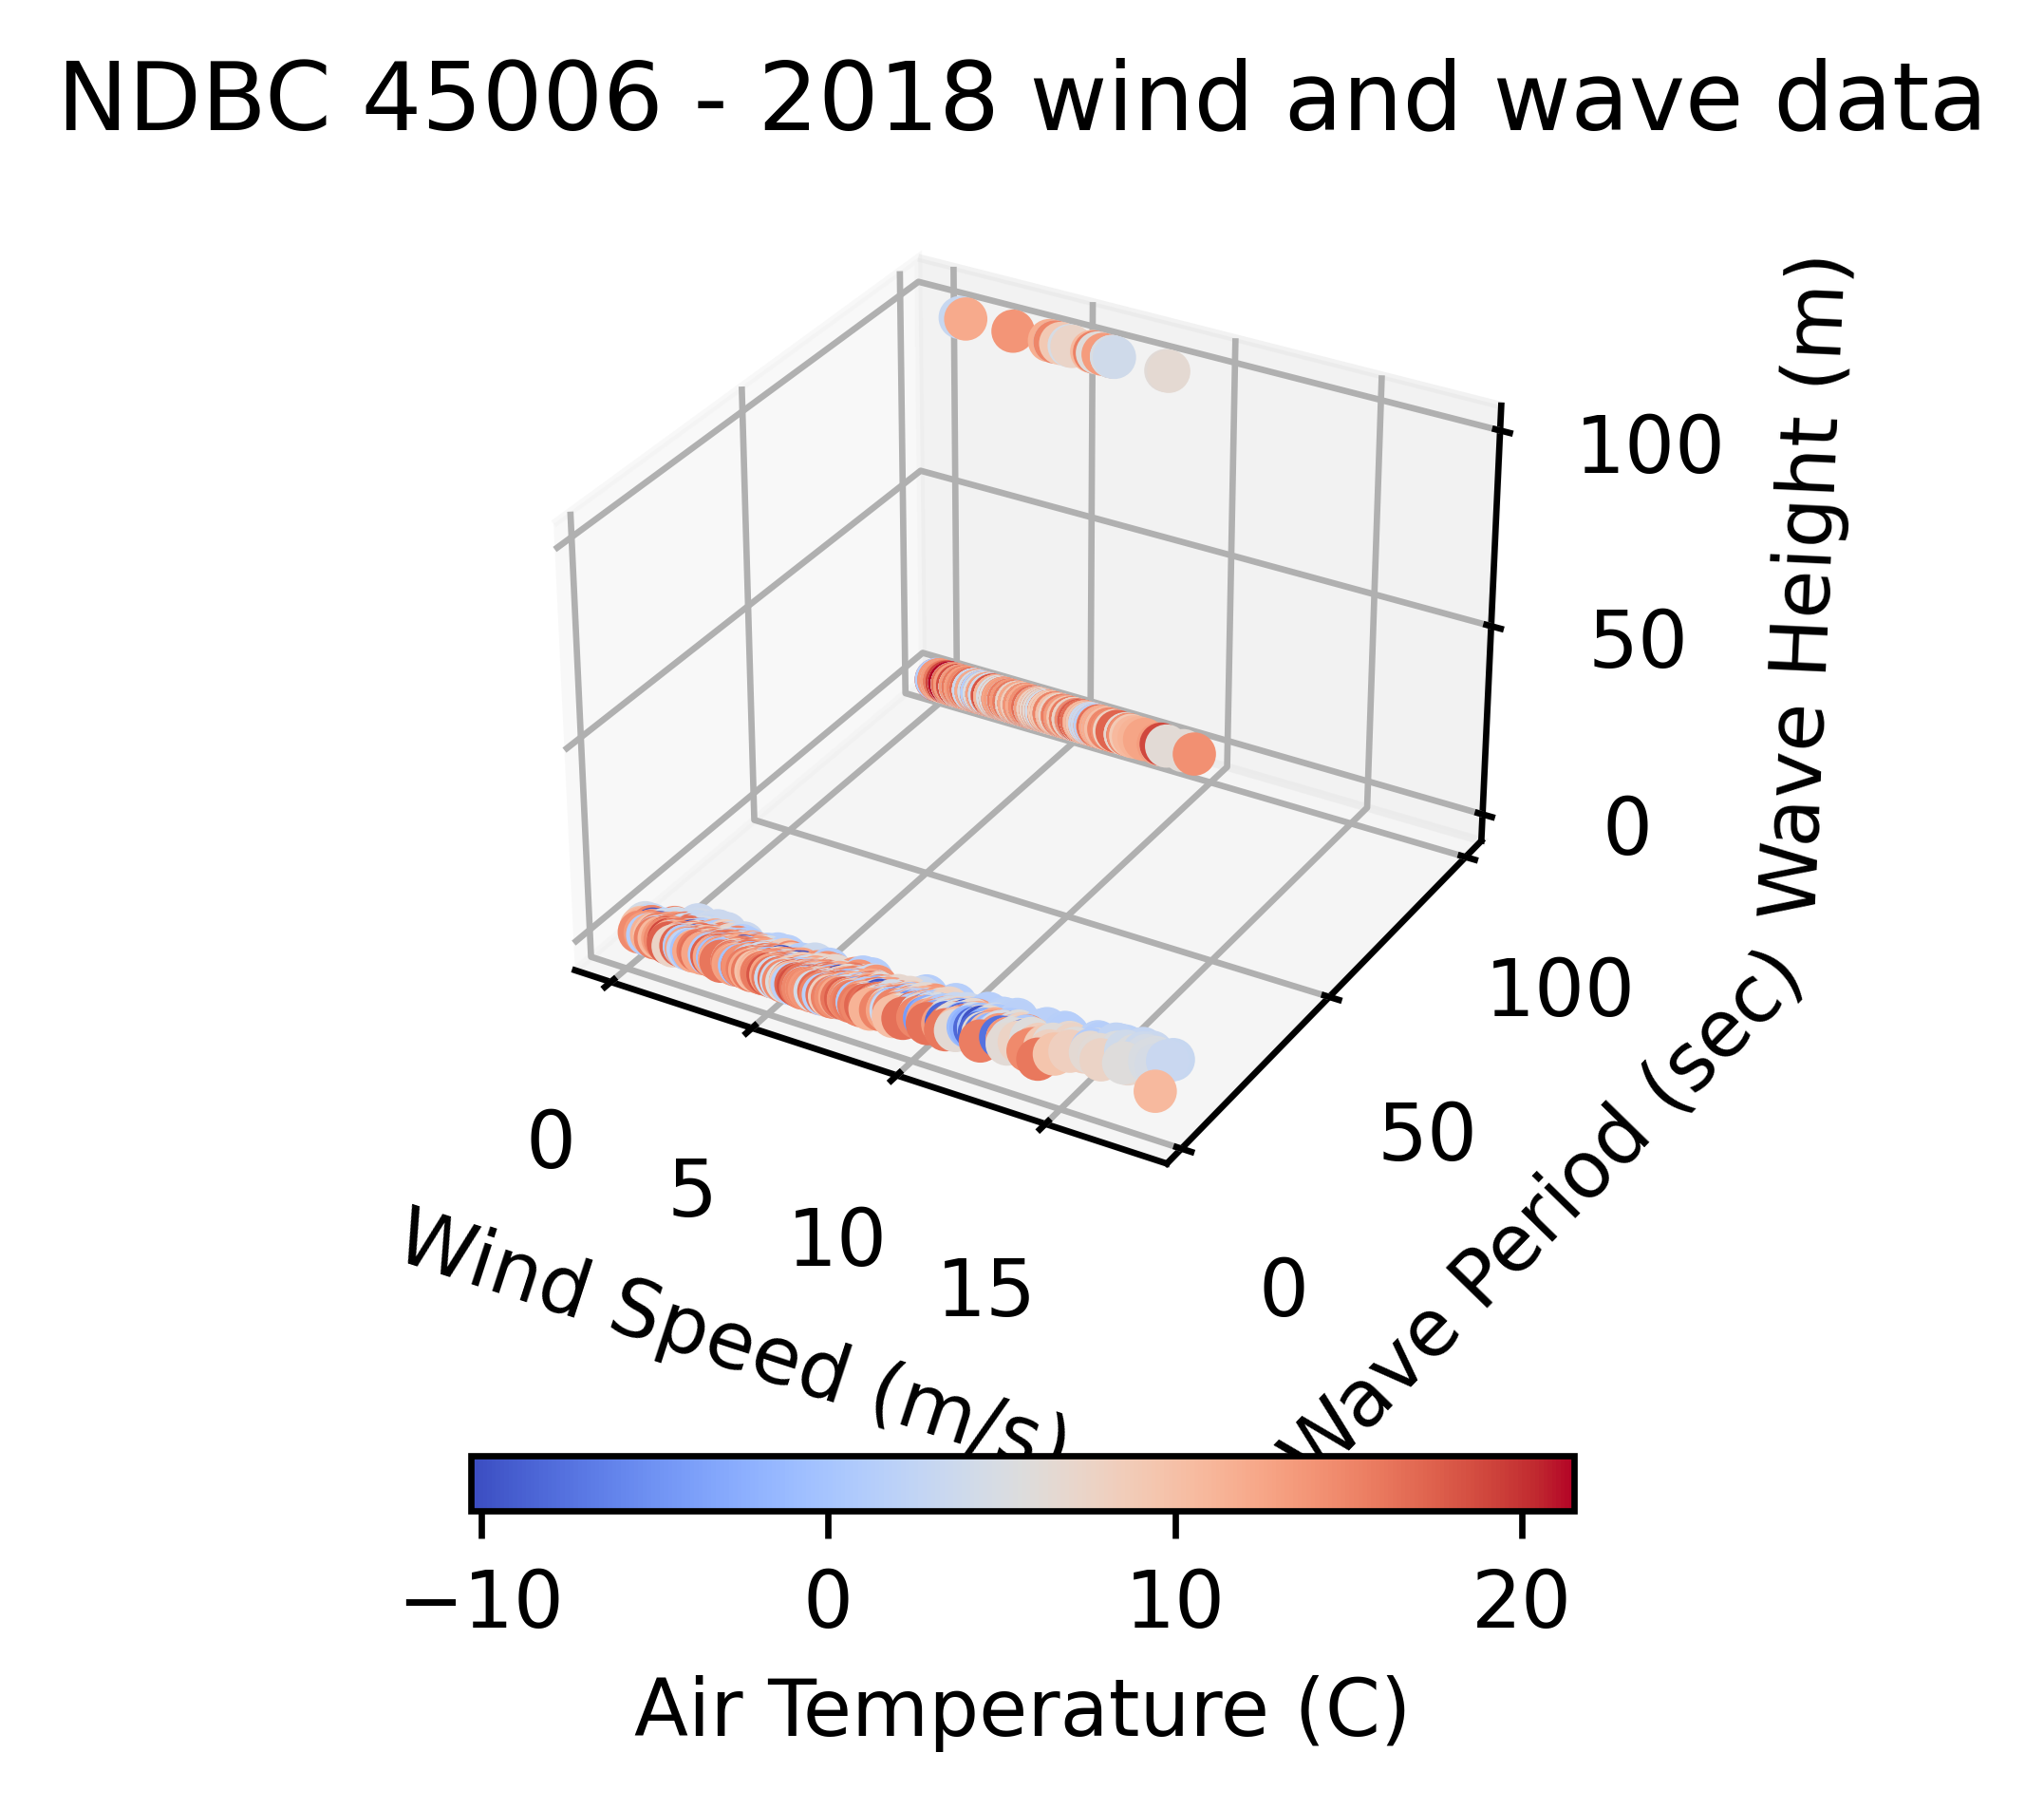

In [4]:
# Now the stdmet has been loaded and we can begin making some plots just to visualize the data!
fig = plt.figure(figsize=[5,3.5],dpi=600)
ax = fig.add_subplot(projection = '3d')

year_data = year_data.iloc[1:,:]

wspd = year_data['WSPD'].to_numpy(dtype='float')
dpd = year_data['DPD'].to_numpy(dtype='float')
wvht = year_data['WVHT'].to_numpy(dtype='float')
atmp = year_data['ATMP'].to_numpy(dtype='float')

sx = ax.scatter(wspd, dpd, wvht, c=atmp, edgecolor=None, cmap='coolwarm', alpha=1)

# Create colorbar, plotted on the air temperature, for example.
plt.colorbar(sx, label='Air Temperature (C)', shrink=0.5, orientation='horizontal')

# add some axis labels and a title
ax.set_xlabel('Wind Speed (m/s)')
ax.set_ylabel('Wave Period (sec)')
ax.set_zlabel('Wave Height (m)')
ax.set_title('NDBC 45006 - 2018 wind and wave data')

plt.show()

### Okay, so that first image works, but it clearly needs some quality control on the data. NDBC uses specific "filler" values for bad data that we need to get rid of. Specifically, they use values of 99 or 999 depending on the variable. Let's filter out those data points and recreate this plot as a comparison!

In [5]:
# First, convert the DataFrame columns we want to arrays of numbers (i.e. floats). This converts over to the numpy package
wdir_clean = year_data['WDIR'].to_numpy(dtype='float')
wspd_clean = year_data['WSPD'].to_numpy(dtype='float')
dpd_clean = year_data['DPD'].to_numpy(dtype='float')
wvht_clean = year_data['WVHT'].to_numpy(dtype='float')
atmp_clean = year_data['ATMP'].to_numpy(dtype='float')
mwd_clean = year_data['MWD'].to_numpy(dtype='float')

# Now, search for those bad data points and get rid of them! (i.e. replace them with NaN....Not A Number)
wspd_clean[wspd_clean==99]=np.nan;
wdir_clean[wdir_clean==999]=np.nan;
dpd_clean[dpd_clean==99]=np.nan;
wvht_clean[wvht_clean==99]=np.nan;
atmp_clean[atmp_clean==99]=np.nan;
mwd_clean[mwd_clean==999]=np.nan;

### Now we can recreate that same figure to see how it was improved by filtering out the bad data points.

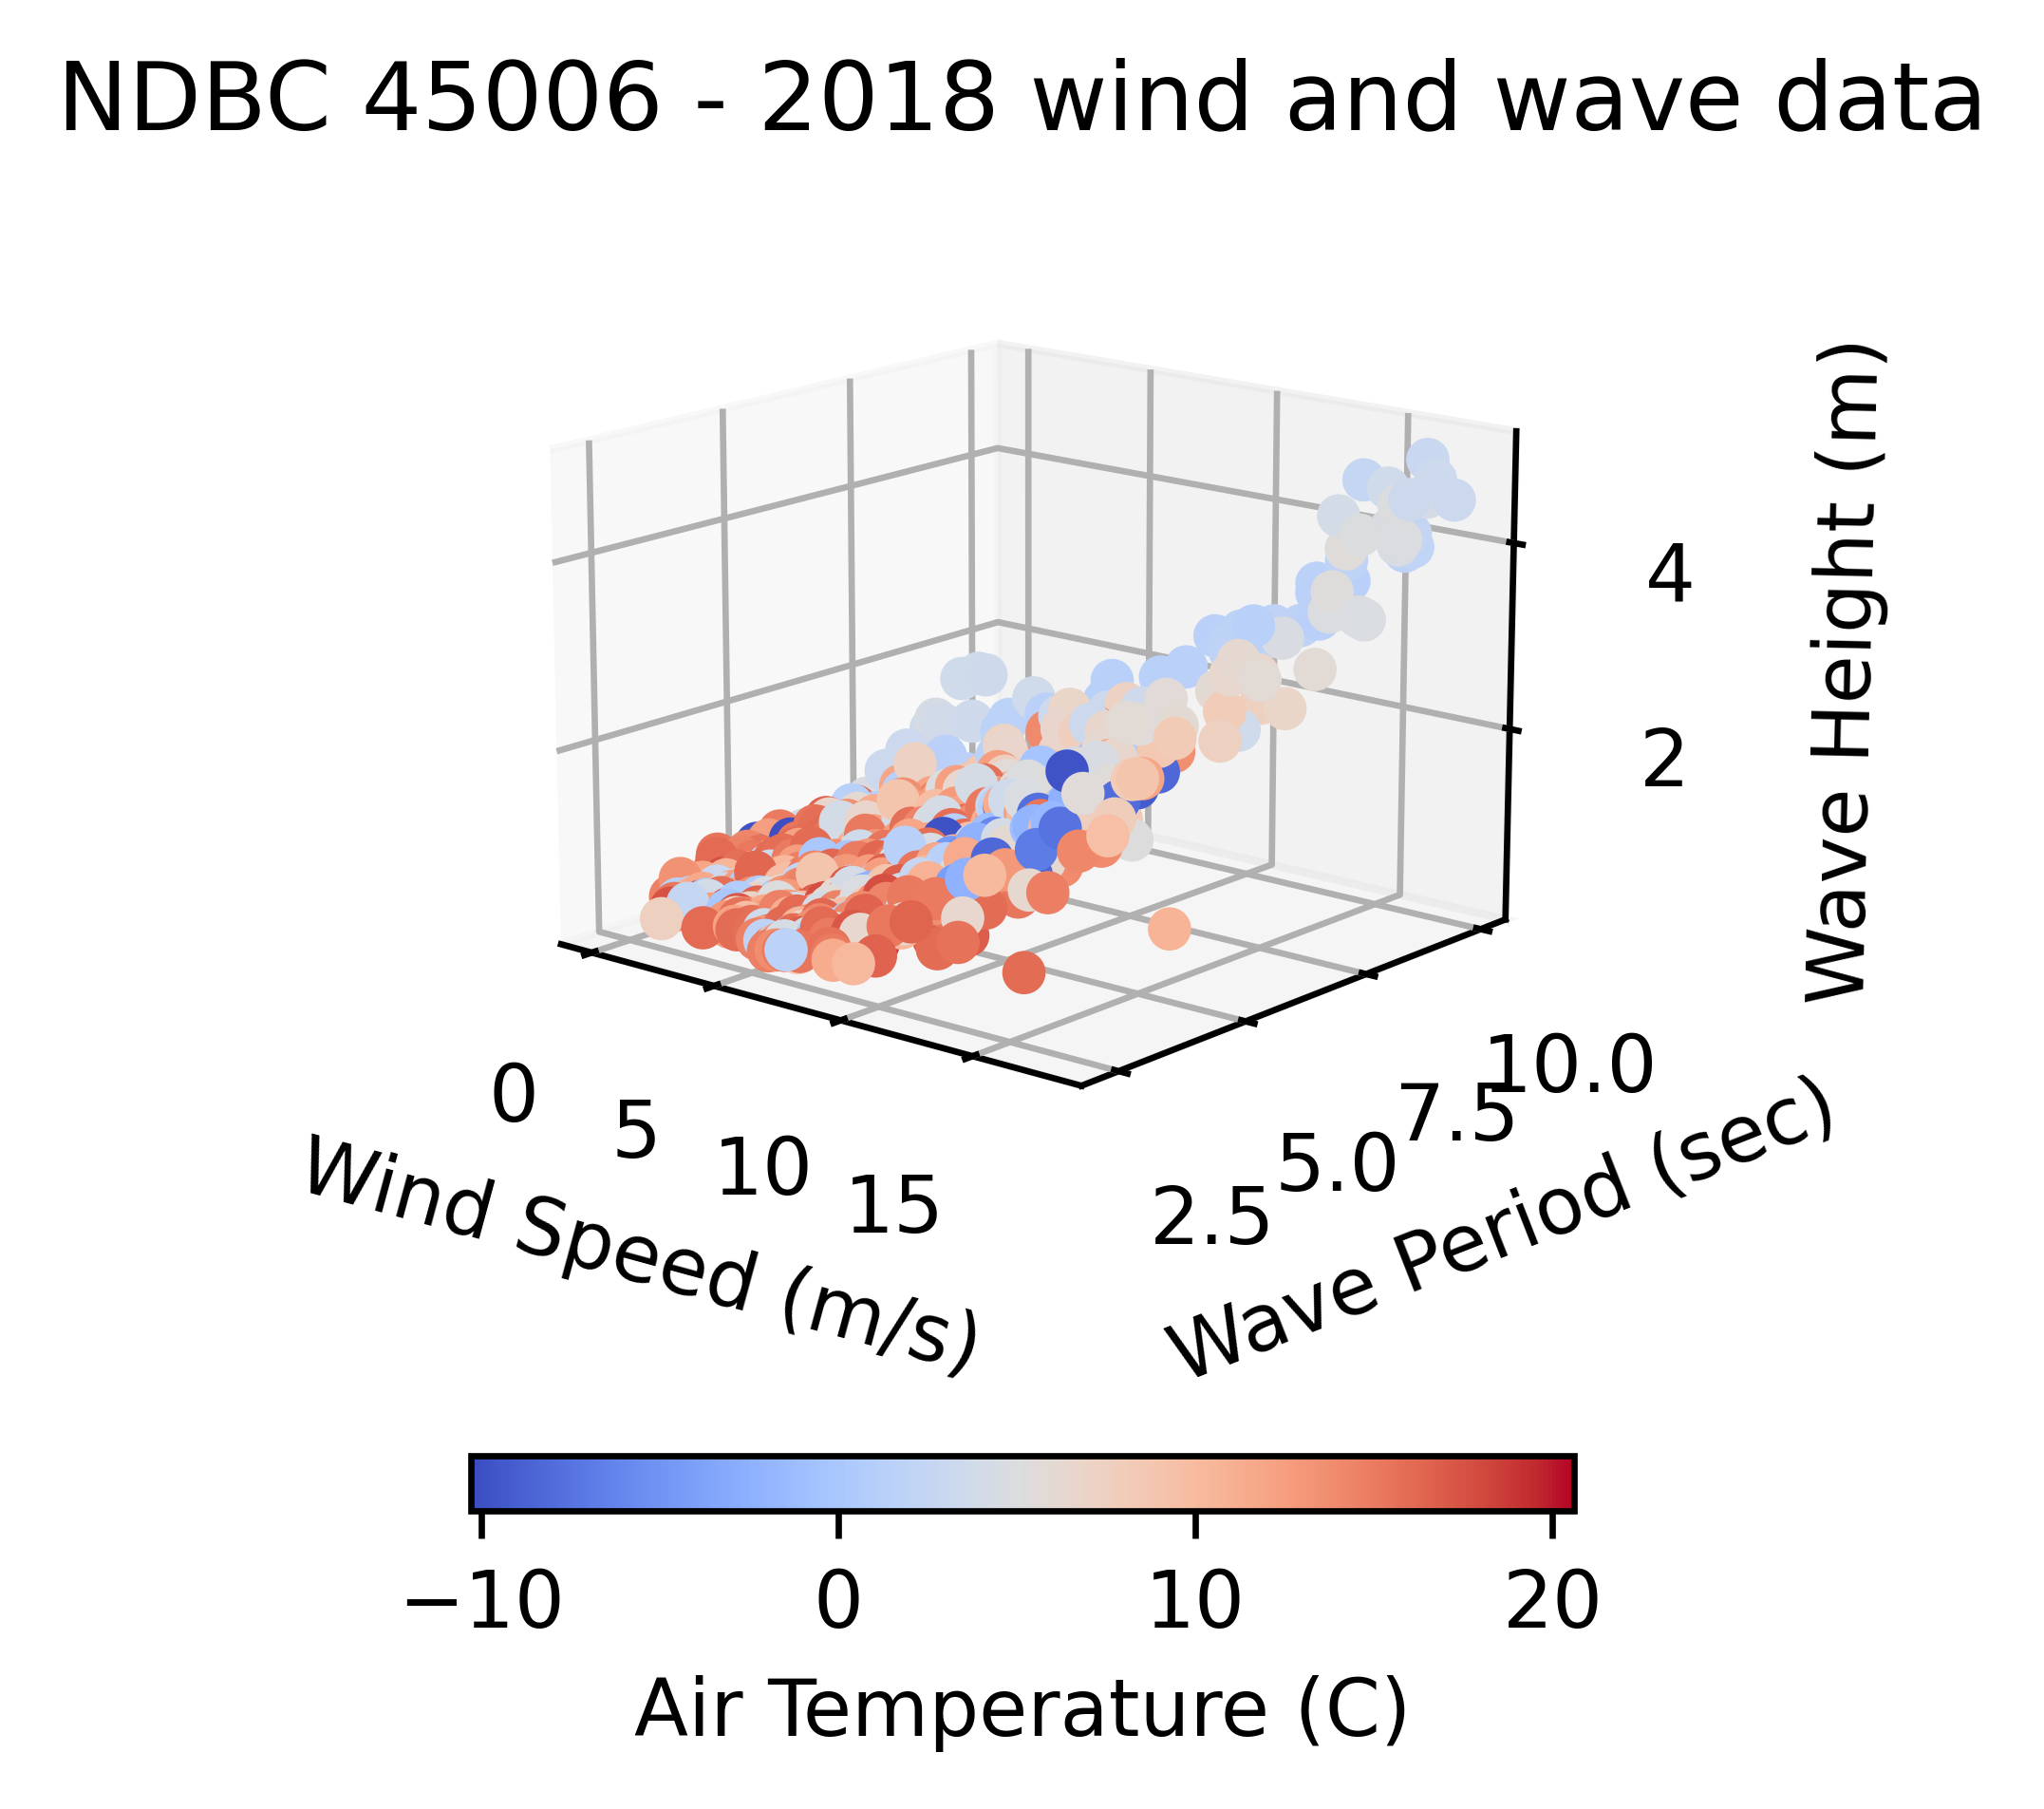

In [6]:
fig1 = plt.figure(figsize=[5,3.5],dpi=600)
ax1 = fig1.add_subplot(projection = '3d')
sx1 = ax1.scatter(wspd_clean, dpd_clean, wvht_clean, c=atmp_clean, edgecolor=None, cmap='coolwarm', alpha=1)
# https://matplotlib.org/stable/gallery/color/colormap_reference.html

# Create colorbar, plotted on the air temperature, for example.
plt.colorbar(sx1, label='Air Temperature (C)', shrink=0.5, orientation='horizontal')

# add some axis labels and a title
ax1.set_xlabel('Wind Speed (m/s)')
ax1.set_ylabel('Wave Period (sec)')
ax1.set_zlabel('Wave Height (m)')
ax1.set_title('NDBC 45006 - 2018 wind and wave data')
ax1.view_init(15, 310)

plt.show()

### Okay, let's also just create a time series plot of some interesting data. How about the wave heights and wave periods during the selected year.

Text(0, 0.5, 'Wave Period (s)')

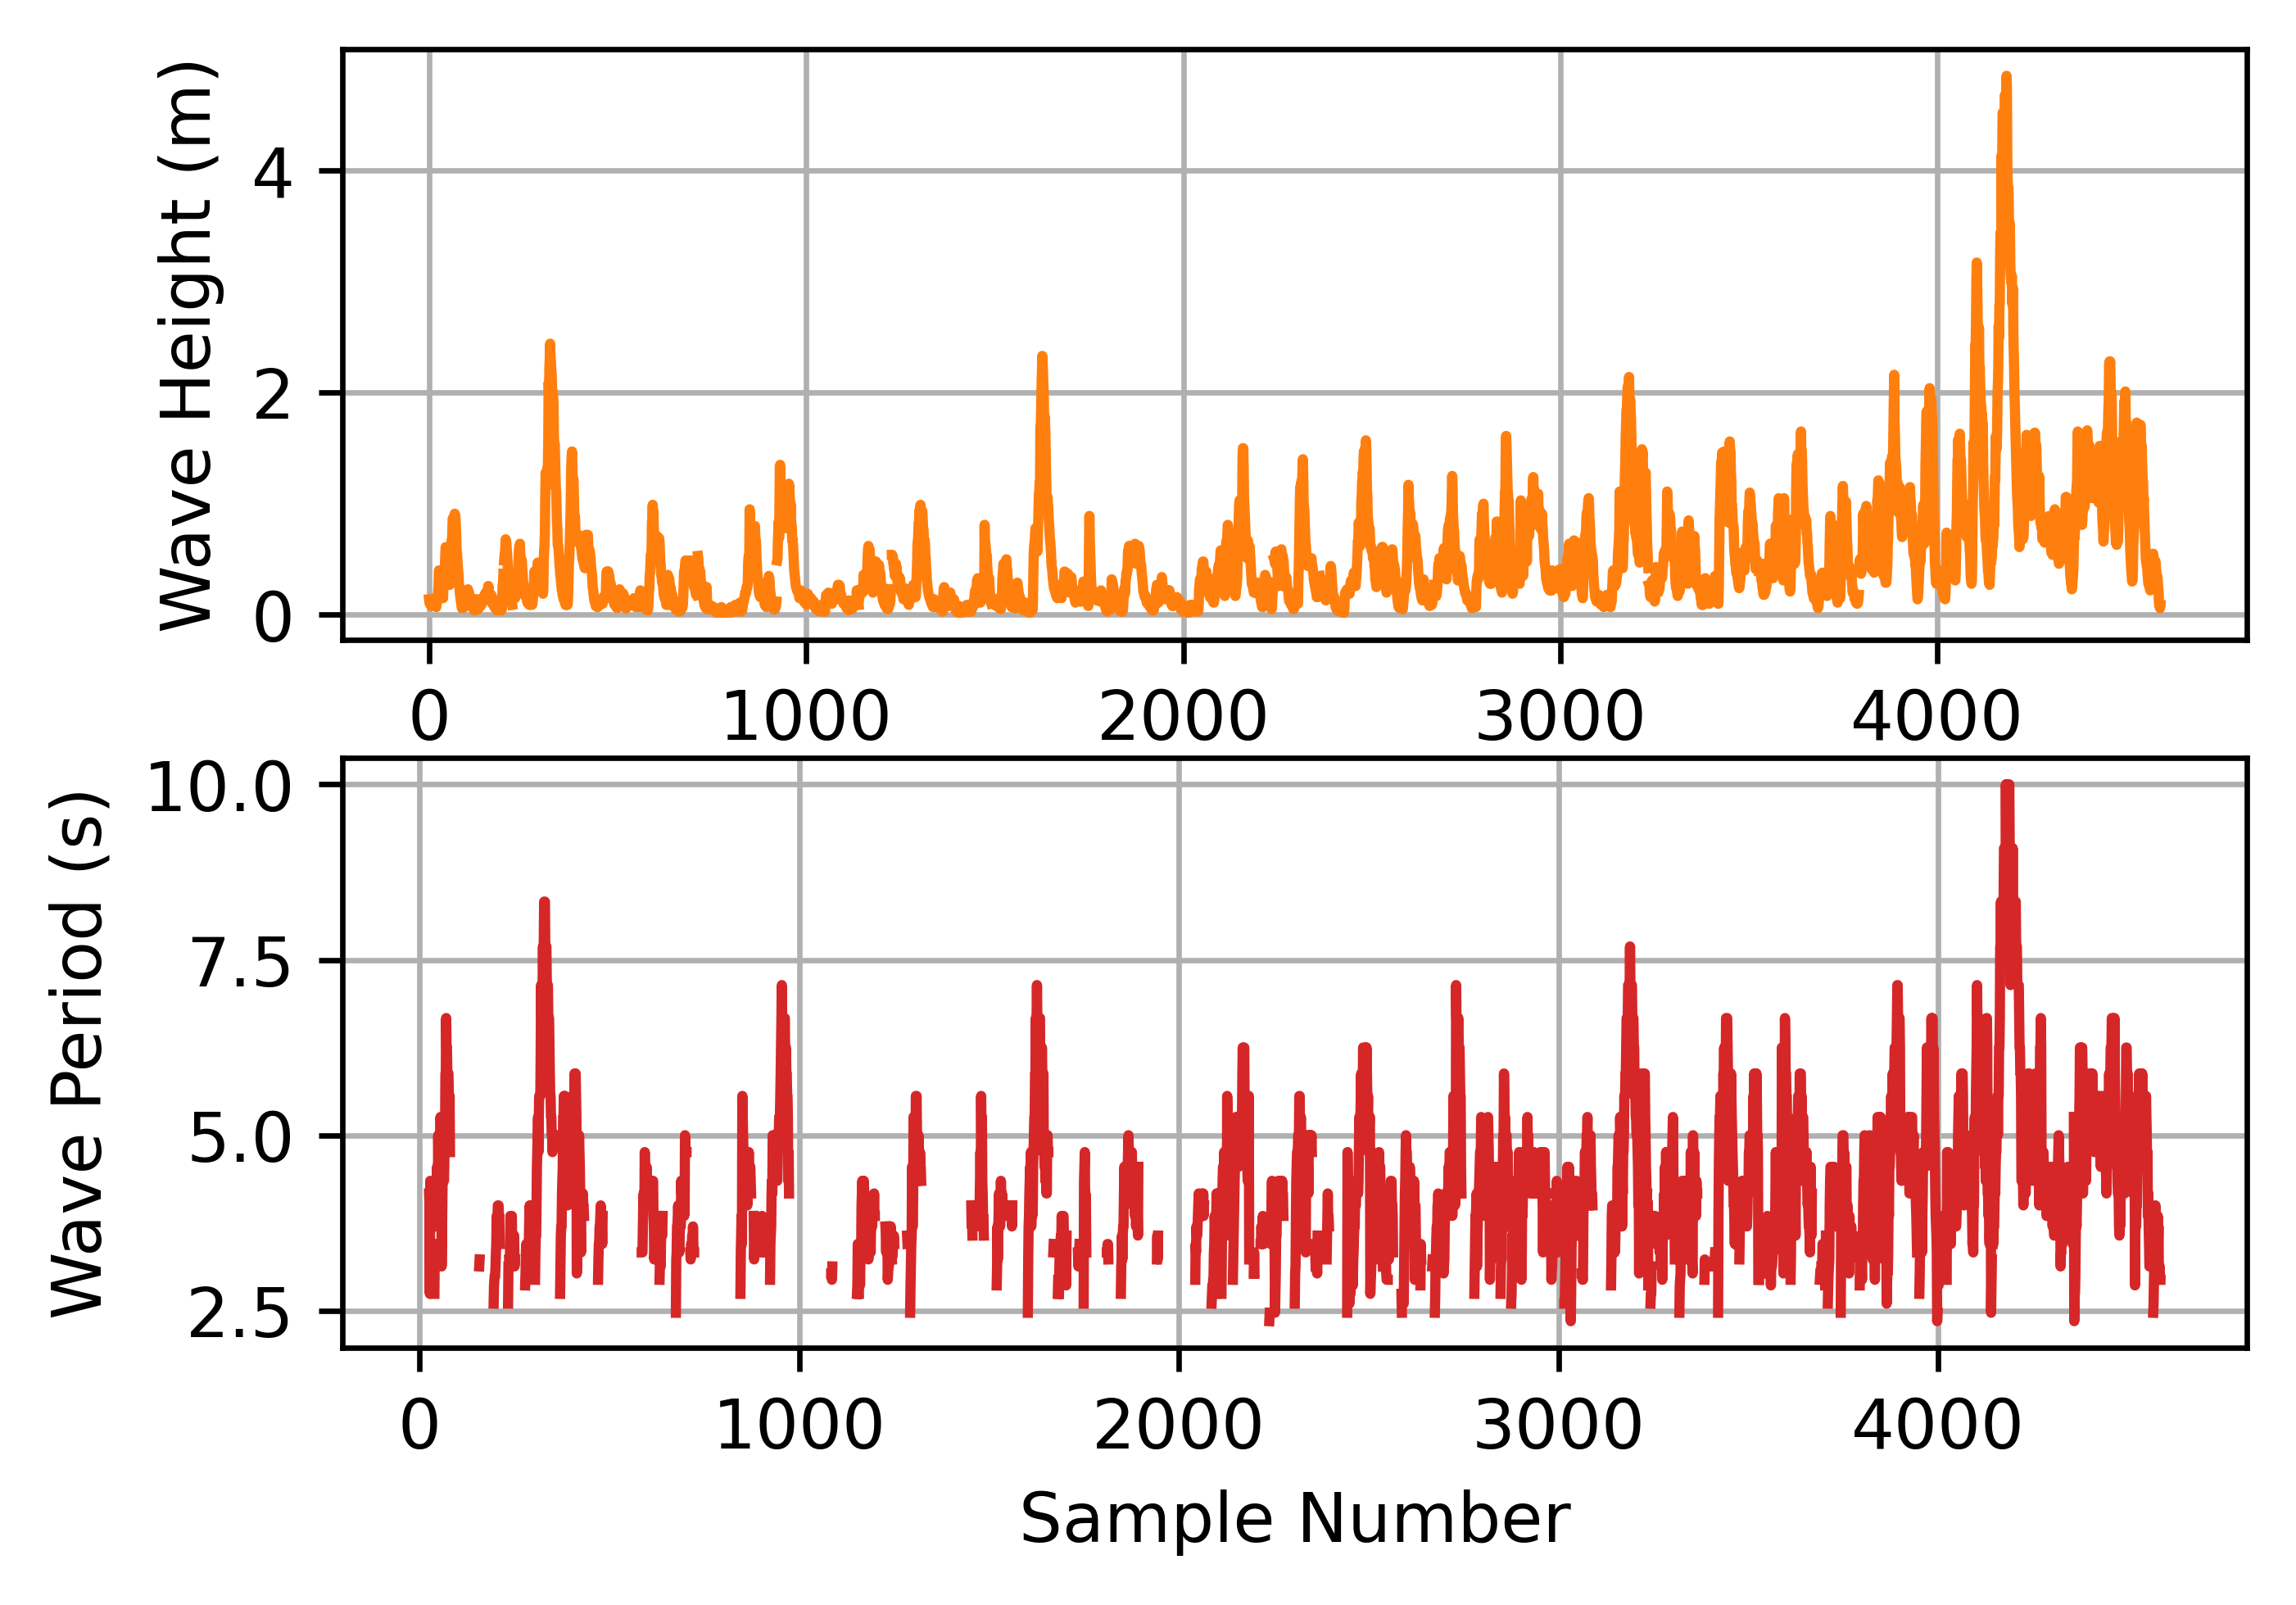

In [7]:
fig2 = plt.figure(figsize=[5,3.5],dpi=600)
pax1 = plt.subplot(211)
plt.plot(wvht_clean,'tab:orange')
plt.grid()
pax1.set_xlabel('Sample Number')
pax1.set_ylabel('Wave Height (m)')
pax2 = plt.subplot(212)
plt.plot(dpd_clean,'tab:red')
plt.grid()
pax2.set_xlabel('Sample Number')
pax2.set_ylabel('Wave Period (s)')

### We can also create a polar plot that shows a scatter point diagram of all the measurements of interest on a 0-360 circle. This is nice because it allows us to better visualize data that has a direction associated with it (i.e. typically wind speeds, mean wave direction, etc.). 

### There are a couple ways to do this. First, we can create a Polar plot that scatters the waves measured. The matplotlib polar projection requires radians as input for the theta angle, so it is important to convert any dataset reported in degrees to radians before plotting.  The distance out from the center of the Polar plot indicates the wave heights in the scenario below. I have colored each point by the respective wind speed, so it makes sense to see the larger wave heights associated with higher wind speeds. 

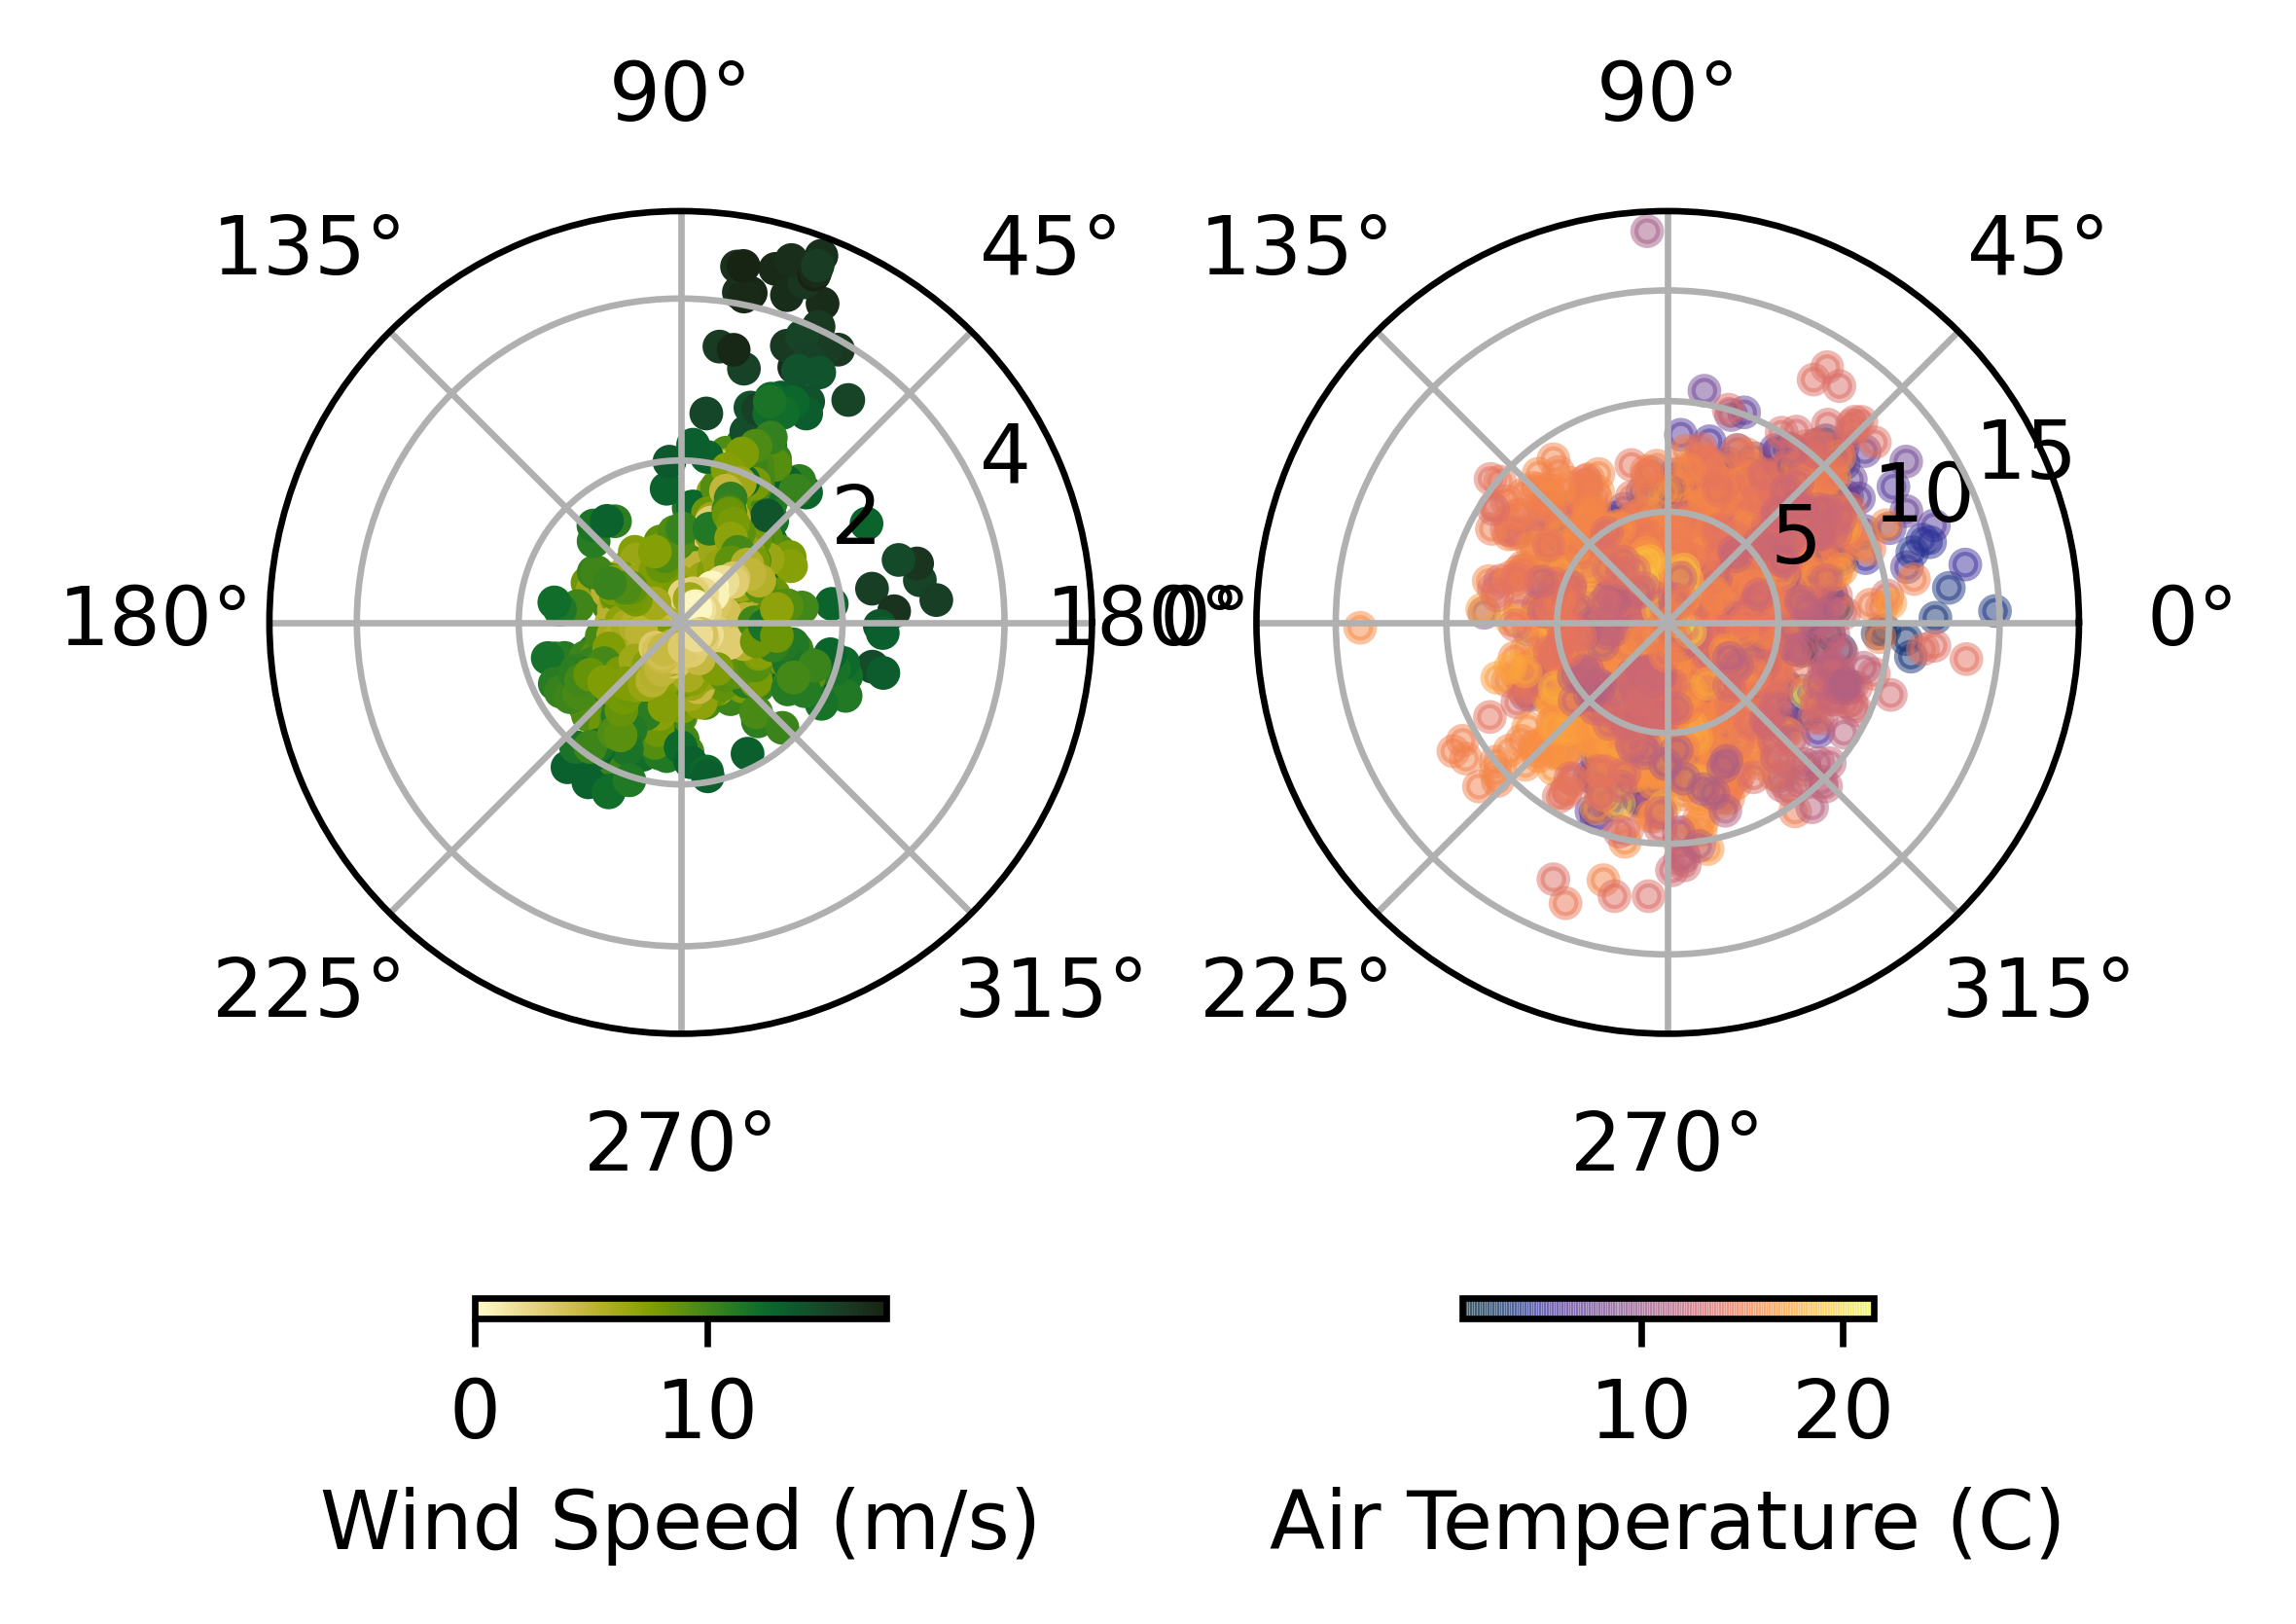

In [31]:
# For the following import to work, you will first need to open a Command Window (in the search bar for windows, type "cmd"). 
# In the Command Window, run the following line: conda install -c conda-forge cmocean
# This will install the cmocean package in your Anaconda Python environment
import cmocean

# Let's make two polar plots side by side using subplots
fig3 = plt.figure(figsize=[4,4],dpi=600)

# left subplot - the "121" means 1 row of figures with 2 columns and plot in column 1
ax3 = plt.subplot(121, projection='polar')
c = ax3.scatter(mwd_clean*(np.pi/180), wvht_clean, c=wspd_clean, s=10, cmap=cmocean.cm.speed, alpha=1)
plt.colorbar(c, label='Wind Speed (m/s)', shrink=0.5, orientation='horizontal')

# right subplot - the "122" means 1 row of figures with 2 columns and plot in column 2
ax4 = plt.subplot(122, projection='polar')
c = ax4.scatter(wdir_clean*(np.pi/180), wspd_clean, c=atmp_clean, s=10, cmap=cmocean.cm.thermal, alpha=0.5)
plt.colorbar(c, label='Air Temperature (C)', shrink=0.5, orientation='horizontal')

# I like exploring the various colormap (cmap) options. Visit the following website to see examples of matplotlib colormaps names:
# https://matplotlib.org/stable/gallery/color/colormap_reference.html
# In dealing with oceanographic type data (like what comes from NDBC buoys), there is a trend to stick with specific colormaps for various parameters.
# See the following reference for more information: https://matplotlib.org/cmocean/
# There is a published paper on the matter too, which is linked within that website above.
# This is why I import cmocean and use the cmaps indicated on that website (first have to: pip install cmocean on cmd window or within code)


# Plot the windrose
# fig = plt.figure(figsize=(6,6))
# ax4 = plt.subplot(122)
# ax4 = WindroseAxes.from_ax(fig=fig)
# ax.bar(year_data['MWD'], year_data['WVHT'], normed=True, opening=1, edgecolor='white')
# ax.set_legend();

# A few comments about the figures above

### Typically meteorological and oceanographic data that has directions associated with it (wind speeds, wave heights, water current speeds, etc.) are plotted with the direction indicating "from which it is coming" (i.e. the direction the waves come from, or the wind comes from). So, the left subplot above plotting mean wave directions and significant wave heights illustrates how a majority of the large waves comes from the NNE direction. This is very common for the Western Arm of Lake Superior when winds funnel down towards Duluth. Take some time to explore how this varies depending on the buoy or which Great Lake you're investigating!

# Calculating Wave Energy

### IEC Standards use the Spectral Wave Energy density data, which is a result of onboard processing on the buoys to perform frequency analysis on wave heights and direction. From the SWD (spectral wave data) files, it is possible to calculate the significant wave height (Hm0) and the wave energy period (Te0), which are then used to calculate the wave energy

### We can take a first look at this by just using the documented significant wave height (H_s) and wave energy period (T_e) from the Standard Meteorological Data files.  We use the general equation:

##### P = (rho * g^2) / (64 * pi) * H_s^2 * T_e


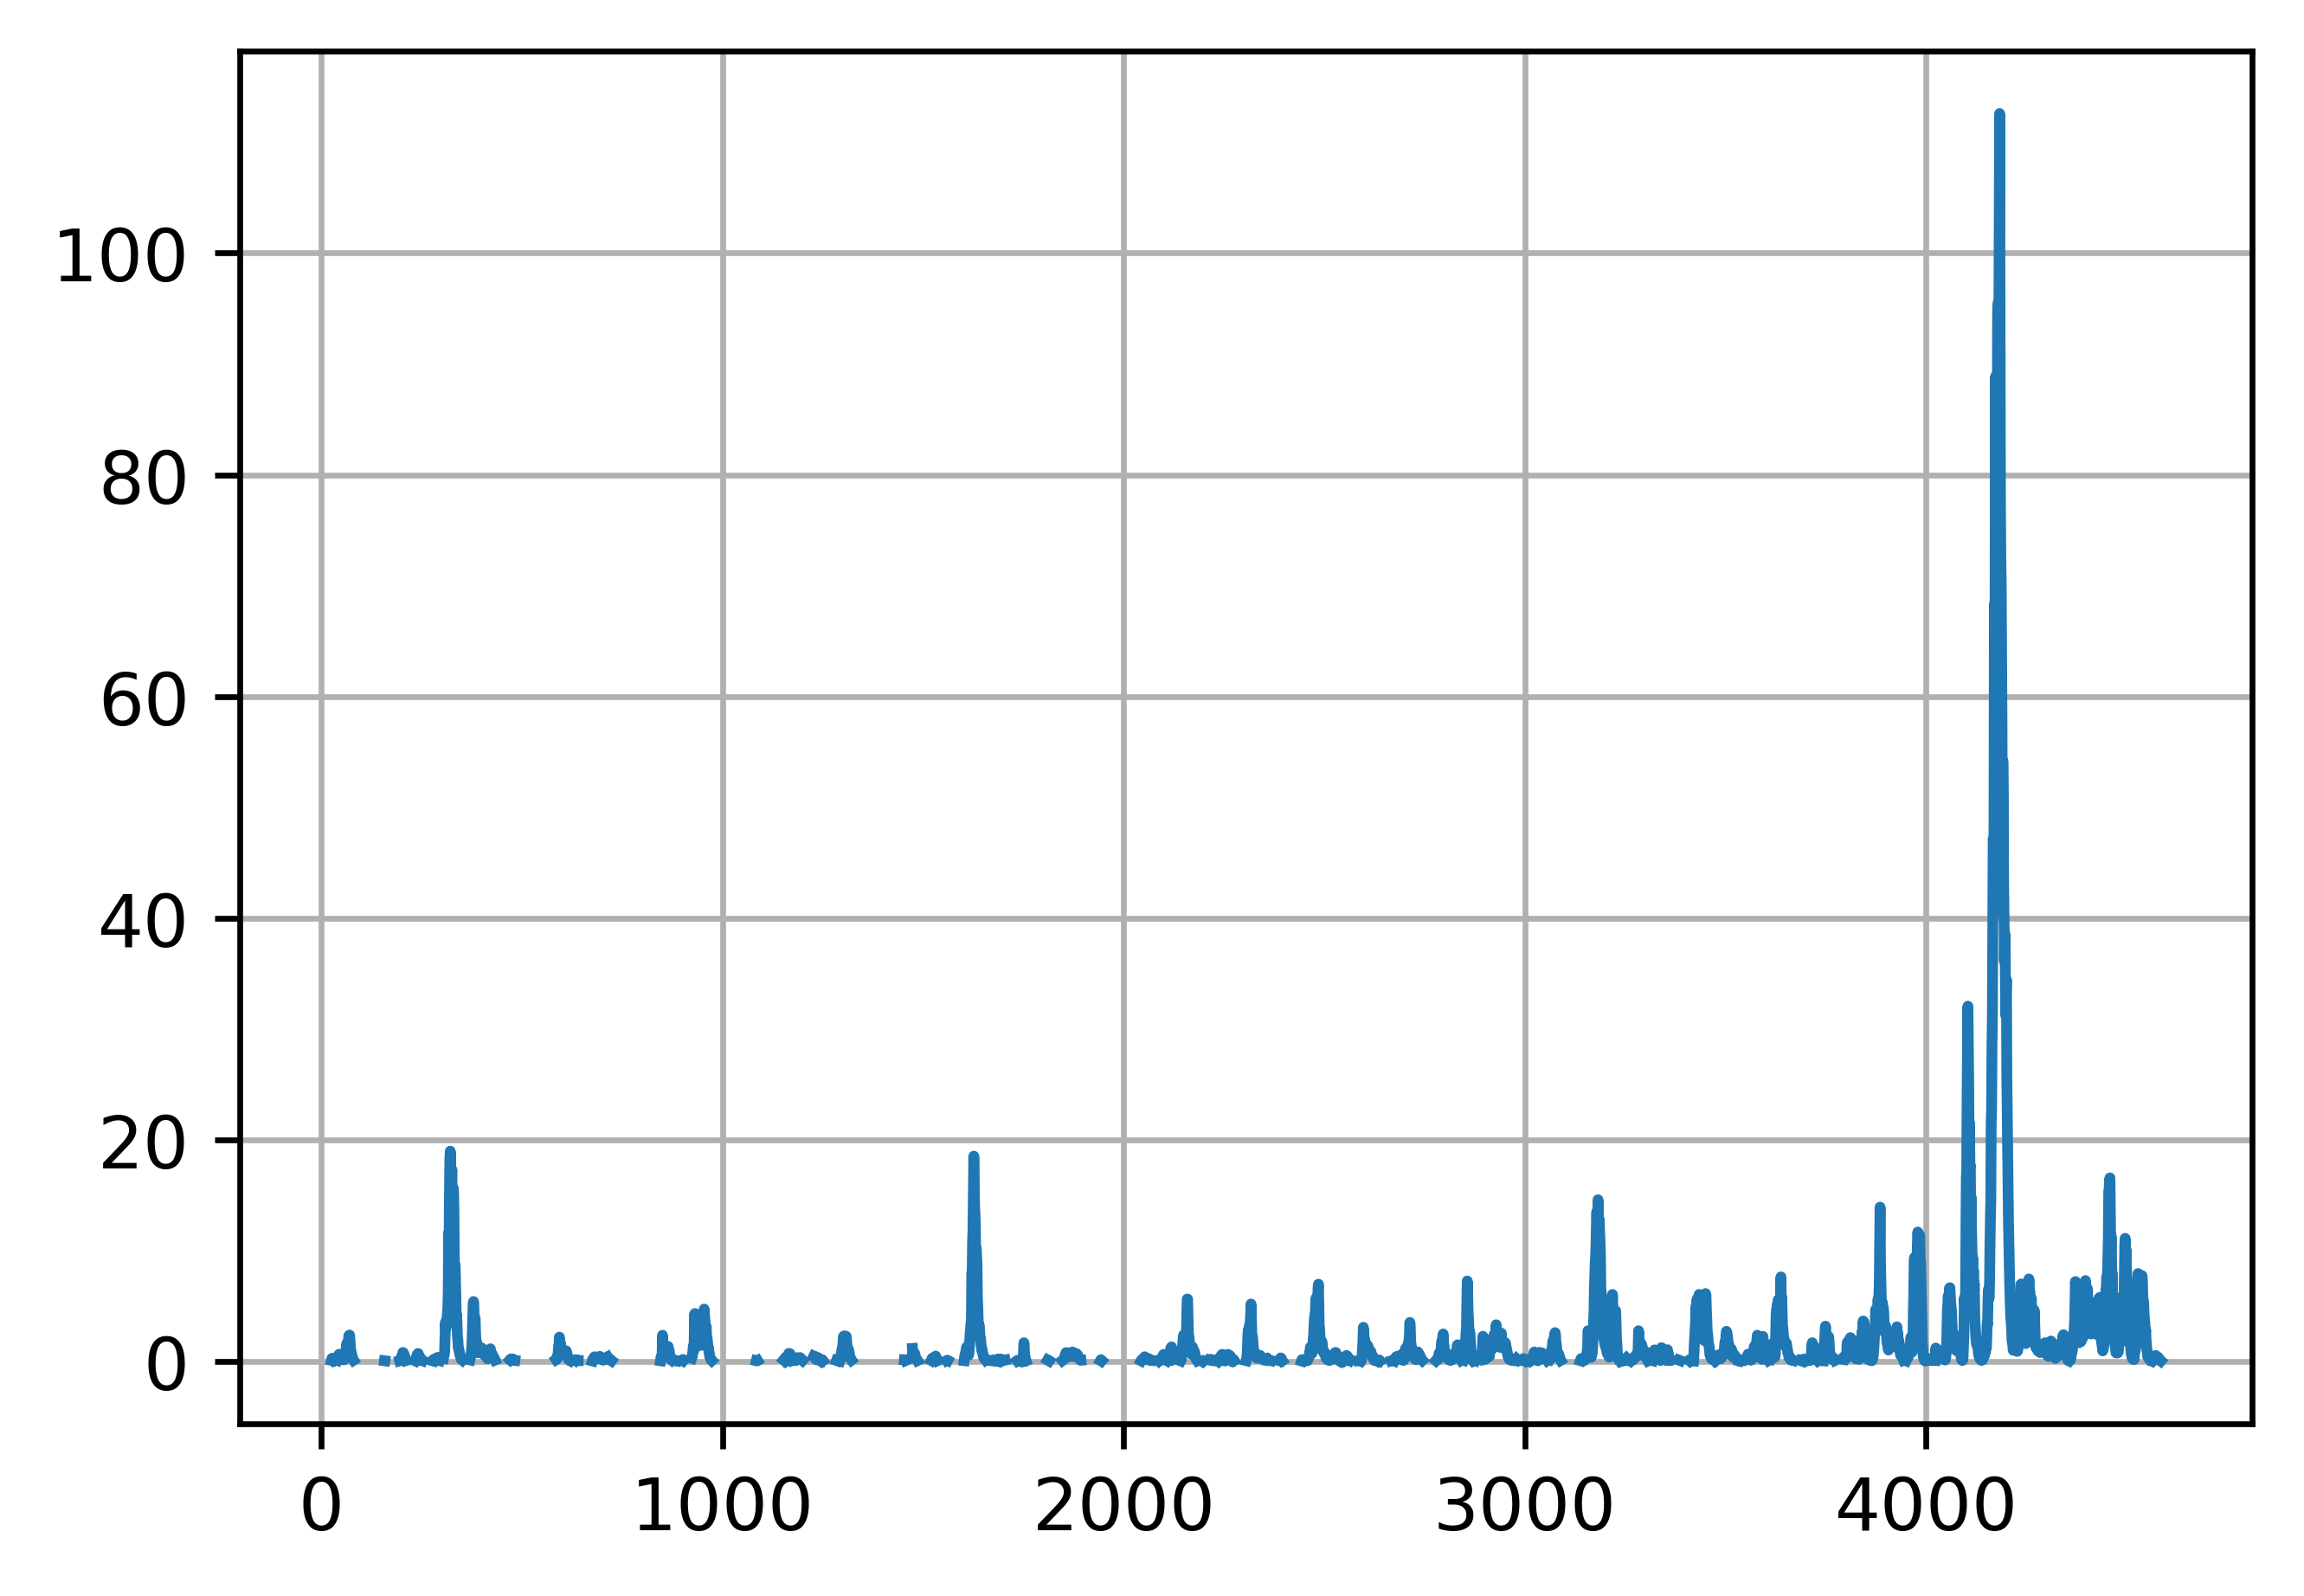

In [9]:
rho = 1000 # units of kg/m^3
g = 9.81 # units of m/s^2
H_s = wvht_clean # units of m
T_e = dpd_clean # units of sec

# through unit analysis, you can see that the units for "P" are Watts per meter (W/m).  In SI units, a Watt is a kg*m^2/s^3 and is the unit of power.

# one way to do this (not the quickest way in code, but a good way to understand the process...) is to create a loop that iterates through the length of the data and calculates the wave energy
for x in range(len(H_s)):
    P = ((rho * g**2) / (64 * np.pi)) * H_s**2 * T_e
    
# convert to kilowatts per meter
P = P/1000

# now we can plot the result!
fig4 = plt.figure(figsize=[5,3.5],dpi=600)
pax4 = plt.subplot
plt.plot(P,'tab:blue')
plt.grid()